# Lösungen

In [1]:
import random
import celluloid as cld
import matplotlib.pyplot as plt

class Cell:
    def __init__(self, row_pos, col_pos):
        """Zellen-Attribute festlegen"""
        
        # Zeilen-Position der Zelle auf Grid
        self.row_pos = row_pos
        
        # Spalten-Position der Zelle auf Grid
        self.col_pos = col_pos
        
        # Lebendigkeits-Status der Zelle (1="lebend", 2="tot"). Wird anfangs zufällig festgelegt.
        self.status = random.randint(0, 1)
        
        # Lebendigkeits-Status der Zelle im nächsten Zeitschritt. (999="noch unbestimmt")
        self.next_status = 999
        
        # Liste, in welche alle Nachbarzellen eingespeichert werden
        self.neighbor_cells = []
    
    
    def find_neighbor_cells(self, grid):
        """Sucht alle 8 Nachbarn der Zelle auf Grid und speichert diese im Cell-Attribut 'neighbor_cells'."""
        
        # Anzahl der Zeilen und Spalten des Grids herausfinden
        n_rows = len(grid)
        n_cols = len(grid[0])
        
        # Zeilenposition überhalb, eigene Zeilenposition und die Zeilenposition unterhalb durchgehen
        for row_deviation in [-1, 0, 1]:
            
            # Spaltenposition links, eigene Spaltenposition und die Spaltenposition rechts durchgehen
            for col_deviation in [-1, 0, 1]:
                
                # Zeilenposition und Spaltenposition der Nachbarzelle berechnen
                neighbor_row = (self.row_pos + row_deviation) % n_rows
                neighbor_col = (self.col_pos + col_deviation) % n_cols
                
                # Nachbarzelle auswählen
                neighbor_cell = grid[neighbor_row][neighbor_col]
                
                # Wenn es eine Nachbarzelle ist und nicht man selbst
                if neighbor_cell != self:
                    # als Nachbarzelle einspeichern
                    self.neighbor_cells.append(neighbor_cell)
                
    
    def set_next_status(self):
        """Prüft, wie viele Nachbarzellen lebendig sind und 
        leitet daraus für sich selbst den nächsten Lebendigkeitsstatus ab."""
        
        # Zählvariable für die Anzahl der lebendigen Nachbarzellen
        n_alive = 0
        
        # Alle Nachbarzellen durchgehen 
        for neighbor_cell in self.neighbor_cells:
            # Zählvariable erhöhen, wenn lebendig (0="tot", 1="lebendig")
            n_alive += neighbor_cell.status
        
        # Nächsten Lebendigkeitsstatus ableiten:
        # Wenn man selbst lebendig ist
        if self.status == 1:
            
            # wenn 2 oder 3 Nachbarzellen lebendig sind
            if n_alive == 2 or n_alive == 3:
                # lebendig bleiben
                self.next_status = 1
            
            # ansonsten
            else:
                # sterben
                self.next_status = 0
        
        # wenn man selbst tot ist
        else:
            # wenn man 3 lebendige Nachbarzellen hat
            if n_alive == 3:
                # lebendig werden
                self.next_status = 1
            # ansonsten
            else:
                # tot bleiben
                self.next_status = 0
            
    def update_status(self):
        """Ersetzt den aktuellen Lebendigkeitsstatus durch den nächsten Lebendigkeitsstatus."""
        if self.next_status != 999:
            self.status = self.next_status
            self.next_status = 999

In [2]:
def create_grid(n_rows, n_cols):
    """Erstellt ein Grid als geschachtelte Liste, welche Cell-Objekte enthält.
    Zudem wird für jede Zelle die Nachbarschaft herausgesucht und eingespeichert."""
    
    # Geschachtelte Liste erstellen und Cell-Objekte einfügen
    grid = []
    for i in range(n_rows):
        row = []
        for j in range(n_cols):
            cell = Cell(row_pos=i, col_pos=j)
            row.append(cell)
        grid.append(row)
    
    # Nachbarzellen finden und einspeichern
    for row in grid:
        for cell in row:
            cell.find_neighbor_cells(grid)
    
    return grid


def create_color_matrix(grid):
    """
    Erstellt ein grafisch darstellbares Abbild des Grids, wobei der Lebendigkeitsstatus der Zellen farblich kodiert werden.
    Eine tote Zelle wird mit der Farbe weiss, eine lebendige Zelle mit der Farbe schwarz kodiert.
    """
    color_matrix = []
    for row in grid:
        color_row = []
        for cell in row:
            if cell.status == 0:
                color = [255, 255, 255]
            else:
                color = [0, 0, 0]
            
            color_row.append(color)
        color_matrix.append(color_row)
    
    return color_matrix

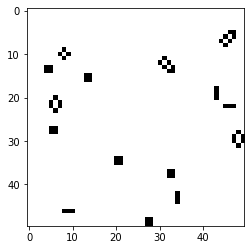

In [6]:
# Matplotlib & Celluloid-Objekte für grafische Darstellung/Animation erstellen
fig, ax = plt.subplots()
camera = cld.Camera(fig)

# Das Grid mit Zellen erstellen
grid = create_grid(50, 50)

# Simulationsloop
# für jeden Zeitschritt
for tick in range(500):
    
    # Grafische Darstellung
    # Grid in farblich darstellbare Matrix übersetzen, diese als Diagramm darstellen und Foto davon schießen
    color_matrix = create_color_matrix(grid)
    plt.imshow(color_matrix)
    camera.snap()
    
    # Synchrone Aktualisierung Schritt 1: Interne Veränderung
    # jede Zelle durchgehen und nächsten Lebendigkeitsstatus festlegen
    for row in grid:
        for cell in row:
            cell.set_next_status()
    
    # Synchrone Aktualisierung Schritt 2: Veränderung sichtbar machen
    # jede Zelle durchgehen und den nächsten Lebendigkeitsstatus in den aktuellen Lebendigkeitsstatus umwandeln
    for row in grid:
        for cell in row:
            cell.update_status()
    
    
# Animation erstellen & speichern
animation = camera.animate()
animation.save("game_of_life_video2.mp4", fps=10, dpi=500)